**Natural Language Processing with Disaster Tweets**


The following code is for the <a href ="https://www.kaggle.com/competitions/nlp-getting-started/data?select=sample_submission.csv"> Kaggle NLP prediction </a> that I particpated in. 

The task: You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0 <br>
The files involved were: <ul>
  <li>- Train.csv [The training dataset]</li>
  <li>- Test.csv  [The test dataset]</li>
  <li>- Submission.csv [The submission dataset]</li>
</ul>

Loading the necessary libraries and the datasets

In [56]:
import pandas as pd    # data processing
import numpy as np   #linear algebra
import nltk
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model,model_selection, preprocessing #Machine learning models


In [57]:
#loading the train dataset 
train_dis = pd.read_csv('C:\\Users\\hp\\Desktop\\Programming\\Machine learning\\Data Science\\Py Notebooks\\Tragedy_sentiment_analysis\\train.csv')
train_dis.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [58]:
#loading the test dataset
test_dis = pd.read_csv('C:\\Users\\hp\\Desktop\\Programming\\Machine learning\\Data Science\\Py Notebooks\\Tragedy_sentiment_analysis\\train.csv')
test_dis.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [59]:
#Checking for nulls 
train_dis.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

The columns missing data are keyword and location <br>
The Keyword column shows the "word" from the tweets that stood out the most such as "He set her house ablaze" <br>
The Keyword will be "Ablaze"

Location column shows where the tweet come from

**Data Cleaning and Exploratory Data Analysis**

In [60]:
#Sample of what a positive tweet and negative tweet looks like
positive=train_dis[train_dis['target']==0]["text"].values[1]
negative=train_dis[train_dis['target']==1]["text"].values[1]


print('This is a positive tweet:\n',positive ,'\nThis is a negative tweet:\n',negative)

This is a positive tweet:
 I love fruits 
This is a negative tweet:
 Forest fire near La Ronge Sask. Canada


I combined the keyword column and the text column to come up with the tweet column for the train and test data set.
This adds more weight to the tweet column for the values that don't have a blank keyword rows

In [61]:

# combine columns A and B with a space in between, if A is not null, otherwise keep B unchanged
train_dis['tweet'] = np.where(train_dis['text'].notnull(), train_dis['text'].astype(str) + ' ' + train_dis['keyword'].astype(str), train_dis['keyword'])
train_dis['tweet'] = train_dis['tweet'].str.replace('nan','')

#Viewing rows where the keywords are not null
df_not_null = train_dis[train_dis['keyword'].notnull()]

df_not_null[['keyword' ,'tweet']]

,keyword,tweet
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C ablaze
32,ablaze,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw ablaze
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi ablaze
34,ablaze,Crying out for more! Set me ablaze ablaze
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N ablaze
...,...,...
7578,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both wrecked
7579,wrecked,Three days off from work and they've pretty much all been wrecked hahaha shoutout to my family for that one wrecked
7580,wrecked,#FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM wrecked
7581,wrecked,@engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO wrecked


In [62]:
#We do the same for the test data since we are using the same logic
test_dis['tweet'] = np.where(test_dis['text'].notnull(), test_dis['text'].astype(str) + ' ' + test_dis['keyword'].astype(str), test_dis['keyword'])
test_dis['tweet'] = test_dis['tweet'].str.replace('nan','')

In [63]:
#Lets go back to our dataset and drop the text column
train_dis.drop('text',axis=1,inplace=True)
train_dis.head(5)


,id,keyword,location,target,tweet
0,1,NaN,NaN,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,1,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,6,NaN,NaN,1,"13,000 people receive #wildfires evacuation orders in California"
4,7,NaN,NaN,1,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school


**Exploratory Data Analysis**

A wordcloud provides the visual perspective needed to get a sense of the words that were used the most.


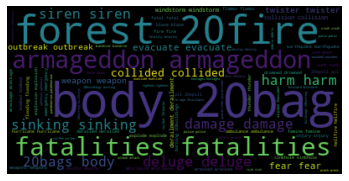

In [77]:
from wordcloud import WordCloud

#replace empty values with an empty string
train_dis['keyword'].fillna('',inplace=True)


#concatenate all text in the column into one string
text = ' '.join(train_dis['keyword'].tolist())

#create a wordcloud from the text
wordcloud = WordCloud().generate(text)

#plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Data Preprocessing**

We first begin by turning the column into data that the model can process.
This can be done through COUNT VECTORIZER which counts the words and turns them into a vector which is a set of numbers that an ML model can work with

In [65]:
count_vectorizer = feature_extraction.text.CountVectorizer()

#Counts for the first 5 tweets
example_train = count_vectorizer.fit_transform(train_dis["tweet"][0:5])
example_train

<5x54 sparse matrix of type '<class 'numpy.int64'>'
	with 61 stored elements in Compressed Sparse Row format>

The .todense() method is used to convert a sparse matrix to a dense matrix. A sparse matrix is a matrix where most of the elements are zero. To store this matrix efficiently, it is stored in a sparse format, which only stores the non-zero elements.

The .todense() method converts this sparse representation of the matrix to a dense matrix, which stores all elements including the zeros. This conversion is useful when you want to perform computations or operations that require the full matrix representation, or when you want to visualize the matrix.

However, converting a sparse matrix to a dense matrix can be memory-intensive, especially if the matrix is large and has a high number of non-zero elements. So, it's recommended to use sparse matrices wherever possible, and only use .todense() when necessary.

In [66]:
print(example_train[0].todense().shape)
print(example_train[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


This means that there is 54 unique words( or "tokens") in the first 5 tweets and the first tweet contains only some of those unique tokens - all the 1's above are the tokens that exist in the first tweet

In [67]:
#Creating the vectors for the tweets
train_vectors = count_vectorizer.fit_transform(train_dis["tweet"])

We are not using .fit_transform() because using .transform() makes sure that the tokens in the train vectors are the only ones mapped to the test vectors : the train and test vectors use the same set of tokens

Also the test data just needs to be transformed not fit

In [68]:
test_vectors = count_vectorizer.transform(test_dis['tweet'])

**Model Building and Evaluation through Cross Validation**

Our vectors are big and pushing our weights toward 0 without completely discounting different words thus using Ridge regression would be advisable

In [69]:
clf = linear_model.RidgeClassifier()

In [70]:
#Using Cross Validation to see how our data would perform on unseen (the test data)

scores = model_selection.cross_val_score( clf, train_vectors, train_dis['target']
,cv = 10, scoring = "f1")
scores

array([0.55909944, 0.36681223, 0.39308176, 0.35343619, 0.4772118 ,
       0.48358209, 0.46231156, 0.42176871, 0.57676903, 0.63433814])

The return score is F1, a combonation of precision call on each of the folds created during cross validation specified by 'cv'.
The model isnt that bad as it would achieve atleast 0.63
Theres room for improvement using better models such as the Logistic Regression using TFIFD as the vectorizer

The TFIFD model is a numerical statistic used to evaluate how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining.

The basic idea behind TF-IDF is that words that appear frequently in a document are important, but words that appear frequently in many documents across the corpus are not as important. The "TF" component represents the term frequency, or the number of times a word appears in a document. The "IDF" component represents the inverse document frequency, or the number of documents in the corpus divided by the number of documents containing the word.

The final TF-IDF score for a word in a document is the product of its term frequency and inverse document frequency. This score can then be used to rank the importance of words in a document and to determine the most relevant words for a given query.

We will switch to a TFIDF model to see how the score improves

**Using TFIDF vectorizer with Logistic Regression model**

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

#The input data
corpus = train_dis["tweet"]
labels = test_dis["target"]

# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(corpus,labels,test_size=0.2, random_state=42)


# Fit the TF-IDF vectorizer on the training data
vectorizer = TfidfVectorizer()
X_train_vectorizer=vectorizer.fit_transform(X_train)

#Train a logistic Regression model on the vectorized training data
classifier = LogisticRegression()
classifier.fit(X_train_vectorizer, y_train)

#Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

#Predict the labels
y_pred = classifier.predict(X_test_vectorized)

#Calculate the accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

#Calculate the F1 score
f1 = f1_score(y_test,y_pred, average = 'weighted')
print("F1 score:", f1)





Accuracy: 0.7977675640183848
F1 score: 0.7964083945530092


The accuracy and F1 score has significantly improved!
Logistic regression seems to have an accuracy of 80% meaning that if the model was to classify positive tweets, more times than not, 80% will be correctly positive tweets and vice versa

In [73]:
#finishing the test
submission = pd.read_csv('C:\\Users\\hp\\Desktop\\Programming\\Machine learning\\Data Science\\Py Notebooks\\Tragedy_sentiment_analysis\\ignore\\sample_submission.csv')
submission.head()


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [74]:
#Converting the prediction dataset into a dataframe
pred = pd.DataFrame({'target': y_pred})
print(len(pred))

#Appending the predictions
submission['target'] = pred
submission.head()



1523


,id,target
0,0,0.0
1,2,0.0
2,3,1.0
3,9,0.0
4,11,1.0


In [75]:
#Extract the file
submission.to_csv("sample_submission.csv",index="False")
